### Assignment 1. Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as op
import warnings
warnings.filterwarnings('ignore')

#### 1. Загрузите данные ex2data1.txt из текстового файла.

In [2]:
data = np.loadtxt('data/Lab 2/ex2data1.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]

#### 2. Постройте график, где по осям откладываются оценки по предметам, а точки обозначаются двумя разными маркерами в зависимости от того, поступил ли данный студент в университет или нет.

In [3]:
def plotData(X, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    plt.plot(X[pos, 0], X[pos, 1], 'k+',
             LineWidth=2, MarkerSize=7)
    plt.plot(X[neg, 0], X[neg, 1], 'ko',
             MarkerFaceCOlor='y', MarkerSize=7)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(['Admitted', 'Not admitted'])
    return plt

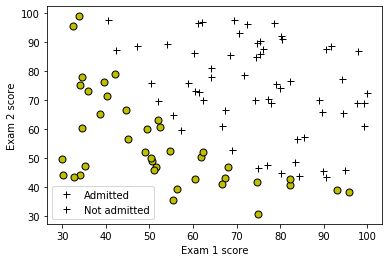

In [4]:
f = plotData(X, y)
f.show()

 
#### 3. Реализуйте функции потерь J(θ) и градиентного спуска для логистической регрессии с использованием векторизации.

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
def costFunction(theta, X, y):
    m = len(y)
    y = y.reshape((m, 1))
    s1 = np.log(sigmoid(X @ theta)).reshape((m, 1))
    s2 = np.log(1 - sigmoid(X @ theta)).reshape((m, 1))
    s = y * s1 + (1 - y) * s2
    return -np.sum(s) / m

In [7]:
def Gradient(theta, X, y):
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    grad = (X.T @ (sigmoid(X @ theta) - y)) / m
    return grad.flatten()

 
#### 4. Реализуйте другие методы (как минимум 2) оптимизации для реализованной функции стоимости (например, Метод Нелдера — Мида, Алгоритм Бройдена — Флетчера — Гольдфарба — Шанно, генетические методы и т.п.).

In [8]:
m, n = np.shape(X)
X = np.concatenate([np.ones((m, 1), dtype='float'), X], axis=1)
initial_theta = np.zeros((n + 1, 1), dtype='float')

res = op.minimize(fun=costFunction,
                  x0=initial_theta,
                  args=(X, y),
                  method='Nelder-Mead',
                  jac=Gradient)
print('Cost at theta found by Nelder-Mead: ', res.fun)
print('theta: ', res.x)

res = op.minimize(fun=costFunction,
                  x0=initial_theta,
                  args=(X, y),
                  method='BFGS',
                  jac=Gradient)
print('Cost at theta found by BFGS: ', res.fun)
print('theta: ', res.x)

Cost at theta found by Nelder-Mead:  0.20349770159021513
theta:  [-25.16130062   0.20623142   0.20147143]
Cost at theta found by BFGS:  0.2034977015894438
theta:  [-25.16133284   0.2062317    0.2014716 ]


#### 5. Реализуйте функцию предсказания вероятности поступления студента в зависимости от значений оценок по экзаменам.

In [9]:
def predict(theta, X):
    p = sigmoid(X @ theta)
    return p > 0.5

In [10]:
prob = sigmoid(np.array([1, 45, 85]) @ res.x)
print('For a student with scores 45 and 85, we predict an admission', prob)

p = predict(res.x, X)
print('Train Accuracy: ', np.mean(p == y) * 100)

For a student with scores 45 and 85, we predict an admission 0.7762907240588942
Train Accuracy:  89.0


#### 6. Постройте разделяющую прямую, полученную в результате обучения модели. Совместите прямую с графиком из пункта 2.

In [11]:
def mapFeature(x1, x2):
    degree = 6
    out = np.ones((x1.shape[0], 1))
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            newColumn = np.multiply(x1 ** (i - j), x2 ** j)
            out = np.column_stack((out, newColumn))
    return out

In [12]:
def plotDecisionBoundary(theta, X, y):
    f = plotData(X[:, 1:], y)
    m, n = X.shape
    if n <= 3:
        plot_x = np.array([min(X[:, 1]) - 2, max(X[:, 1]) + 2])
        plot_y = -(plot_x.dot(theta[1]) + theta[0]) / theta[2]
        f.plot(plot_x, plot_y, label='Test Data', color='b')
        plt.show()
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((len(u), len(v)), dtype='float')
        for i in range(len(u)):
            for j in range(len(v)):
                z[i][j] = mapFeature(np.array([u[i]]), np.array([v[j]])) @ theta
        z = z.T
        plt.contour(u, v, z)
        plt.show()

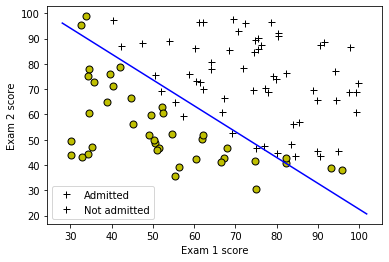

In [13]:
plotDecisionBoundary(res.x, X, y)

#### 7. Загрузите данные ex2data2.txt из текстового файла.

In [14]:
data = np.loadtxt('data/Lab 2/ex2data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]

#### 8. Постройте график, где по осям откладываются результаты тестов, а точки обозначаются двумя разными маркерами в зависимости от того, прошло ли изделие контроль или нет.

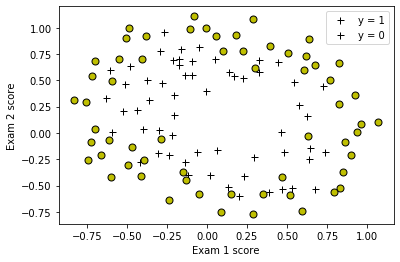

In [15]:
f = plotData(X, y)
f.legend(['y = 1', 'y = 0'])
f.show()

#### 9. Постройте все возможные комбинации признаков x1 (результат первого теста) и x2 (результат второго теста), в которых степень полинома не превышает 6, т.е. 1, x1, x2, x12, x1x2, x22, …, x1x25, x26 (всего 28 комбинаций).

In [16]:
X = mapFeature(X[:, 0], X[:, 1])

#### 10. Реализуйте L2-регуляризацию для логистической регрессии и обучите ее на расширенном наборе признаков методом градиентного спуска.

In [17]:
def costFunctionReg(theta, X, y, l):
    m = len(y)
    J = costFunction(theta, X, y)
    J += l / (2 * m) * (theta.T @ theta - theta[0] ** 2)
    return J

In [18]:
def GradientReg(theta, X, y, l):
    m, n = X.shape
    theta = theta.reshape(n,)
    grad = Gradient(theta, X, y)
    grad += l / m * theta
    grad[0] -= l / m * theta[0]
    return grad

In [19]:
initial_theta = np.zeros((X.shape[1], 1), dtype='float')
l = 1
cost = costFunctionReg(initial_theta, X, y, l)
grad = GradientReg(initial_theta, X, y, l)
print('Cost at initial theta: ', cost)
print('Gradient at initial theta: ', grad)

Cost at initial theta:  [[0.69314718]]
Gradient at initial theta:  [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


#### 11. Реализуйте другие методы оптимизации.

In [20]:
initial_theta = np.zeros((X.shape[1], 1), dtype='float')
# Set regularization parameter lambda(0 = overfitting, 1 = ok, 100 = underfitting)
l = 1

res = op.minimize(fun=costFunctionReg,
                  x0=initial_theta,
                  args=(X, y, l),
                  method='Nelder-Mead',
                  jac=GradientReg)

print('Cost at theta found by Nelder-Mead: ', res.fun)
print('theta: ', res.x)

res = op.minimize(fun=costFunctionReg,
                  x0=initial_theta,
                  args=(X, y, l),
                  method='BFGS',
                  jac=GradientReg)

print('Cost at theta found by BFGS: ', res.fun)
print('theta: ', res.x)

Cost at theta found by Nelder-Mead:  0.6017807866898415
theta:  [ 7.78474422e-01  1.27182715e-01  4.75983939e-01 -2.18280957e+00
 -1.52220743e-01 -3.71047841e-01  6.36377272e-01 -2.66232146e-01
 -2.91045118e-01 -2.43213453e-02 -6.16636744e-01  3.07808818e-01
  8.70622493e-01 -4.00084098e-01 -1.01879743e+00 -5.88265456e-02
  1.03033738e-01 -5.53878327e-01  2.67341255e-01  6.63791332e-01
 -1.45639042e-03 -2.50504767e-01  8.25086936e-01  5.31526320e-01
  3.63302473e-02 -3.87114166e-01  1.05272704e+00 -5.30771886e-01]
Cost at theta found by BFGS:  0.5290027422869218
theta:  [ 1.27268739  0.62557016  1.1809665  -2.01919822 -0.91761468 -1.43194199
  0.12375921 -0.36513086 -0.35703388 -0.17485805 -1.45843772 -0.05129676
 -0.61603963 -0.2746414  -1.19282569 -0.24270336 -0.20570022 -0.04499768
 -0.27782709 -0.29525851 -0.45613294 -1.04377851  0.02762813 -0.29265642
  0.01543393 -0.32759318 -0.14389199 -0.92460119]


#### 12. Реализуйте функцию предсказания вероятности прохождения контроля изделием в зависимости от результатов тестов.

In [21]:
p = predict(res.x, X)
print('Train Accuracy: ', round(np.mean(p == y) * 100, 1))

Train Accuracy:  83.1


#### 13. Постройте разделяющую кривую, полученную в результате обучения модели. Совместите прямую с графиком из пункта 7.

Cost at theta found by fminunc:  0.5290027422869218
theta:  [ 1.27268739  0.62557016  1.1809665  -2.01919822 -0.91761468 -1.43194199
  0.12375921 -0.36513086 -0.35703388 -0.17485805 -1.45843772 -0.05129676
 -0.61603963 -0.2746414  -1.19282569 -0.24270336 -0.20570022 -0.04499768
 -0.27782709 -0.29525851 -0.45613294 -1.04377851  0.02762813 -0.29265642
  0.01543393 -0.32759318 -0.14389199 -0.92460119]


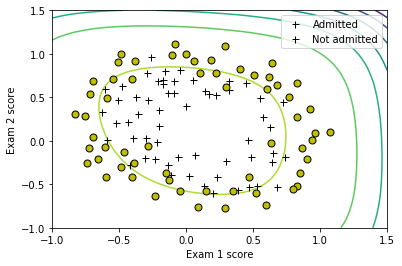

In [22]:
print('Cost at theta found by fminunc: ', res.fun)
print('theta: ', res.x)
plotDecisionBoundary(res.x, X, y)

#### 14. Попробуйте различные значения параметра регуляризации λ. Как выбор данного значения влияет на вид разделяющей кривой? Ответ дайте в виде графиков.

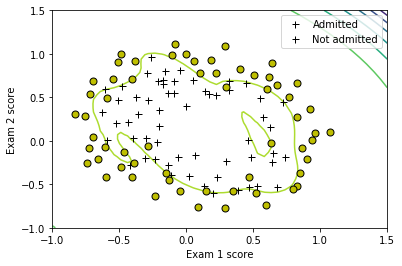

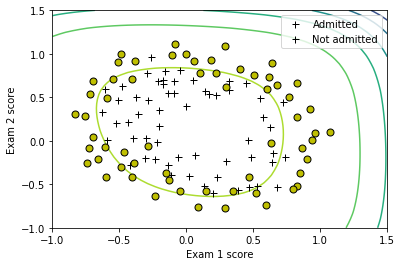

In [23]:
res = op.minimize(fun=costFunctionReg,
                  x0=initial_theta,
                  args=(X, y, 0),
                  method='BFGS',
                  jac=GradientReg)

plotDecisionBoundary(res.x, X, y)

res = op.minimize(fun=costFunctionReg,
                  x0=initial_theta,
                  args=(X, y, 2),
                  method='BFGS',
                  jac=GradientReg)

plotDecisionBoundary(res.x, X, y)
